<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [6]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [7]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


## TASK 2:  Generate Descriptive Statistics and Visualizations

### Median value of owner-occupied homes (BOX PLOT)

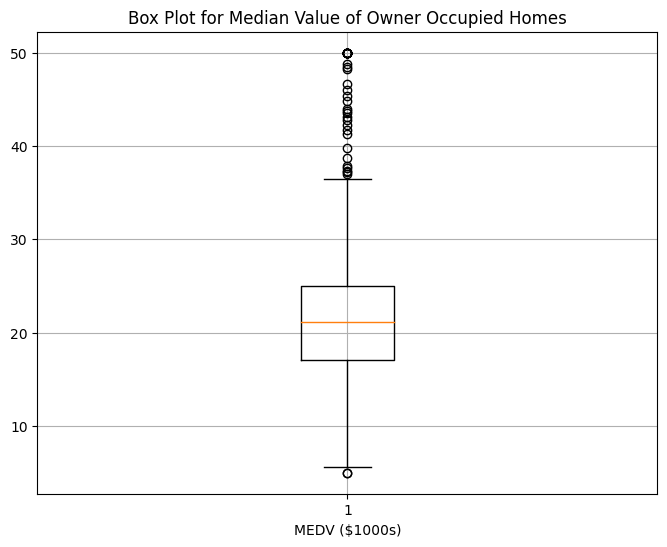

In [8]:
pyplot.figure(figsize=(8,6))
pyplot.boxplot(boston_df['MEDV'])
pyplot.title("Box Plot for Median Value of Owner Occupied Homes")
pyplot.xlabel('MEDV ($1000s)')
pyplot.grid(True)
pyplot.show()

#### The median value is about 21

### Provide a  bar plot for the Charles river variable

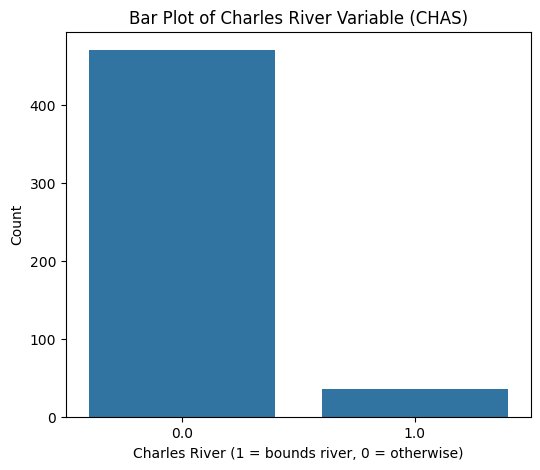

In [9]:
pyplot.figure(figsize=(6,5))
sns.countplot(x="CHAS", data=boston_df)
pyplot.title("Bar Plot of Charles River Variable (CHAS)")
pyplot.xlabel("Charles River (1 = bounds river, 0 = otherwise)")
pyplot.ylabel("Count")
pyplot.show()

#### Most of the tracts don't bound the river

### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

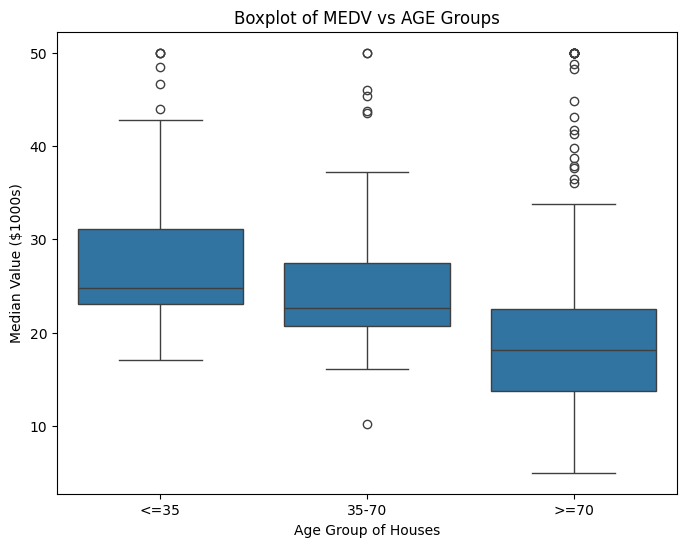

In [10]:
boston_df["AGE_Group"] = pd.cut(
    boston_df["AGE"], 
    bins=[0, 35, 70, 100], 
    labels=["<=35", "35-70", ">=70"]
)

pyplot.figure(figsize=(8,6))
sns.boxplot(x="AGE_Group", y="MEDV", data=boston_df)
pyplot.title("Boxplot of MEDV vs AGE Groups")
pyplot.xlabel("Age Group of Houses")
pyplot.ylabel("Median Value ($1000s)")
pyplot.show()

### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

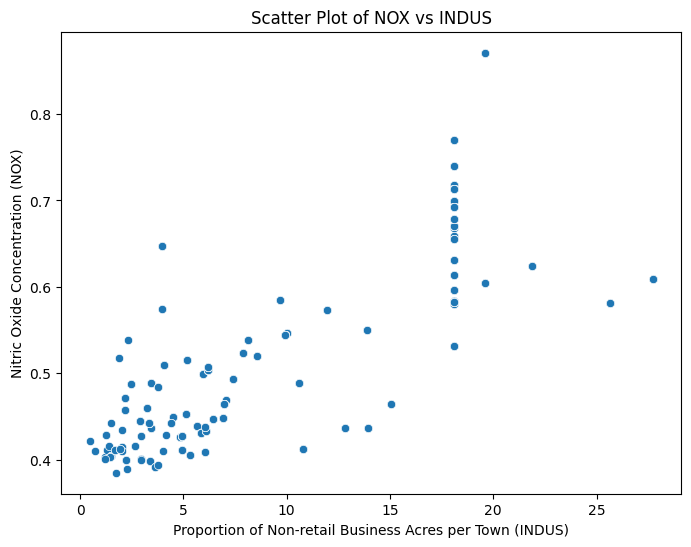

In [11]:
pyplot.figure(figsize=(8,6))
sns.scatterplot(x="INDUS", y="NOX", data=boston_df)
pyplot.title("Scatter Plot of NOX vs INDUS")
pyplot.xlabel("Proportion of Non-retail Business Acres per Town (INDUS)")
pyplot.ylabel("Nitric Oxide Concentration (NOX)")
pyplot.show()

### Create a histogram for the pupil to teacher ratio variable

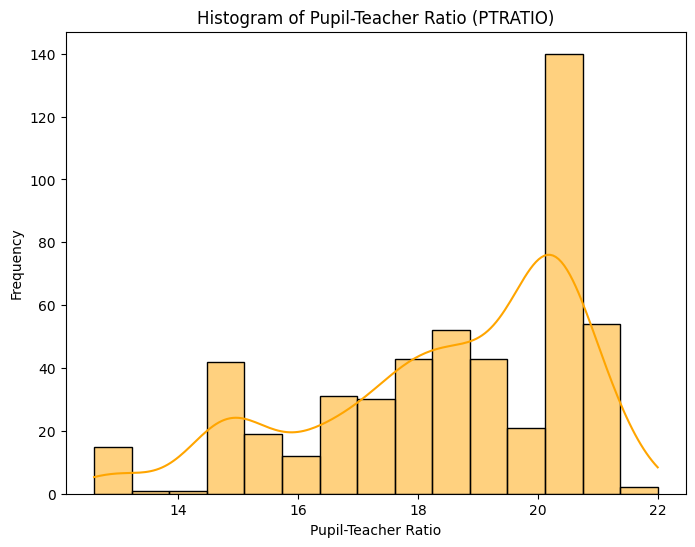

In [12]:
pyplot.figure(figsize=(8,6))
sns.histplot(boston_df["PTRATIO"], bins=15, kde=True, color="orange")
pyplot.title("Histogram of Pupil-Teacher Ratio (PTRATIO)")
pyplot.xlabel("Pupil-Teacher Ratio")
pyplot.ylabel("Frequency")
pyplot.show()

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

#### H0 = There is no significant difference in MEDV based on CHAS.
#### α = 0.05

In [13]:
chas_0 = boston_df[boston_df["CHAS"] == 0]["MEDV"]
chas_1 = boston_df[boston_df["CHAS"] == 1]["MEDV"]

t_stat, p_val = scipy.stats.ttest_ind(chas_0, chas_1, equal_var=False)
print("T-statistic:", t_stat, "P-value:", p_val)

if p_val < 0.05:
    print("Reject H0 → There is a significant difference in MEDV based on CHAS.")
else:
    print("Fail to reject H0 → No significant difference in MEDV based on CHAS.")

T-statistic: -3.113291312794837 P-value: 0.003567170098137517
Reject H0 → There is a significant difference in MEDV based on CHAS.


#### Conclusion: There is a significant difference in MEDV based on CHAS.

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

#### H0 = There is no significant difference among AGE groups.
#### α = 0.05

In [14]:
anova = ols("MEDV ~ C(AGE_Group)", data=boston_df).fit()
anova_table = sm.stats.anova_lm(anova, typ=2)
print(anova_table)

# Extract p-value safely
p_val = anova_table["PR(>F)"].iloc[0]

if p_val < 0.05:
    print("Reject H0 → MEDV differs significantly among AGE groups.")
else:
    print("Fail to reject H0 → No significant difference among AGE groups.")

                    sum_sq     df         F        PR(>F)
C(AGE_Group)   5401.731883    2.0  36.40765  1.710501e-15
Residual      37314.563532  503.0       NaN           NaN
Reject H0 → MEDV differs significantly among AGE groups.


#### Conclusion: MEDV differs significantly among AGE groups.

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

#### H0 = There is no significant difference among AGE groups.
#### α = 0.05

In [19]:
from scipy.stats import pearsonr

# Calculate Pearson correlation between NOX and INDUS
corr, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f"Pearson correlation coefficient: {corr:.3f}")
print(f"P-value: {p_value:.3e}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant correlation between NOX and INDUS")
else:
    print("There is no statistically significant correlation between NOX and INDUS.")


Pearson correlation coefficient: 0.764
P-value: 7.913e-98
There is a statistically significant correlation between NOX and INDUS.


#### Conclusion: There is a statistically significant correlation between NOX and INDUS

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

#### H0 = There is no significant difference among AGE groups.
#### α = 0.05


In [21]:
from sklearn.linear_model import LinearRegression

# Reshape X for sklearn
X = df[['DIS']]
y = df['MEDV']

# Fit the model
reg = LinearRegression()
reg.fit(X, y)

print(f"Intercept: {reg.intercept_:.2f}")
print(f"Coefficient for DIS: {reg.coef_[0]:.2f}")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 18 Sep 2025   Prob (F-statistic):           1.21e-08
Time:                        14:14:17   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0